<a href="https://colab.research.google.com/github/timothyvanco/machineLearning/blob/master/ML_Learning/Lenet_MNIST_Colab/lenet_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LENET


#### INPUT => CONV => TANH => POOL => CONV => TANH => POOL => FC => TANH => FC

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np

In [0]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)

        # if using "channels first", update input shape
        if K.image_data_format() == "channel_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same", input_shape=inputShape)) # 20 filters, each of size 5x5
        model.add(Activation("relu"))                                         # ReLU activation function
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))             # 2x2 pooling with 2x2 stride - decreasing input volume size by 75%

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        model.add(Flatten())        # input volume is flattened
        model.add(Dense(500))       # fully-connected layer with 500 nodes
        model.add(Activation("relu"))

        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return constructed network architecture
        return model

[INFO] accessing MNIST...
11493376/11490434 [==============================] - 0s 0us/step
[INFO] compiling model...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
[INFO] training network...
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 185us/sample - loss: 0.9790 - acc: 0.7373 - val_loss: 0.3178 - val_acc: 0.9057
Epoch 2/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2723 - acc: 0.9185 - val_loss: 0.1976 - val_acc: 0.9433
Epoch 3/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1935 - acc: 0.9422 - val_loss: 0.1639 - val_acc: 0.9506
Epoch 4/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1513 - acc: 0.9559 - val_loss: 0.1173 - val_acc: 0.9657
Epoch 5/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1239 - acc: 0.9633 - val_loss: 0.0982 - val_acc: 0.9705
Epoch 6/20
60000/60000 [====

KeyError: ignored

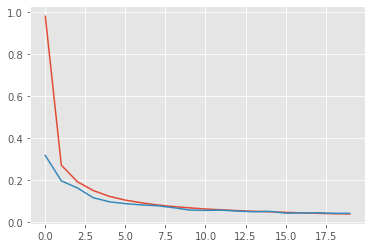

In [3]:
# grab the MNIST dataset
print("[INFO] accessing MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

# if using "channels first" ordering, then reshape the design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
	testData = testData.reshape((testData.shape[0], 1, 28, 28))

# otherwise, using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
	testData = testData.reshape((testData.shape[0], 28, 28, 1))

# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

# convert the labels from integers to vectors
le = LabelBinarizer()
trainLabels = le.fit_transform(trainLabels)
testLabels = le.transform(testLabels)

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainData, trainLabels,
	validation_data=(testData, testLabels), batch_size=128,
	epochs=20, verbose=1)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testData, batch_size=128)
print(classification_report(testLabels.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in le.classes_]))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()